## Boston Housing Price Prediction

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [52]:
# set display options
sns.set()
pd.options.display.float_format = '{:,.3f}'.format

In [11]:
# load and display part of the data
df = pd.read_csv("boston_data.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


### Attributes 
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

### Exploratory data analysis

In [12]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


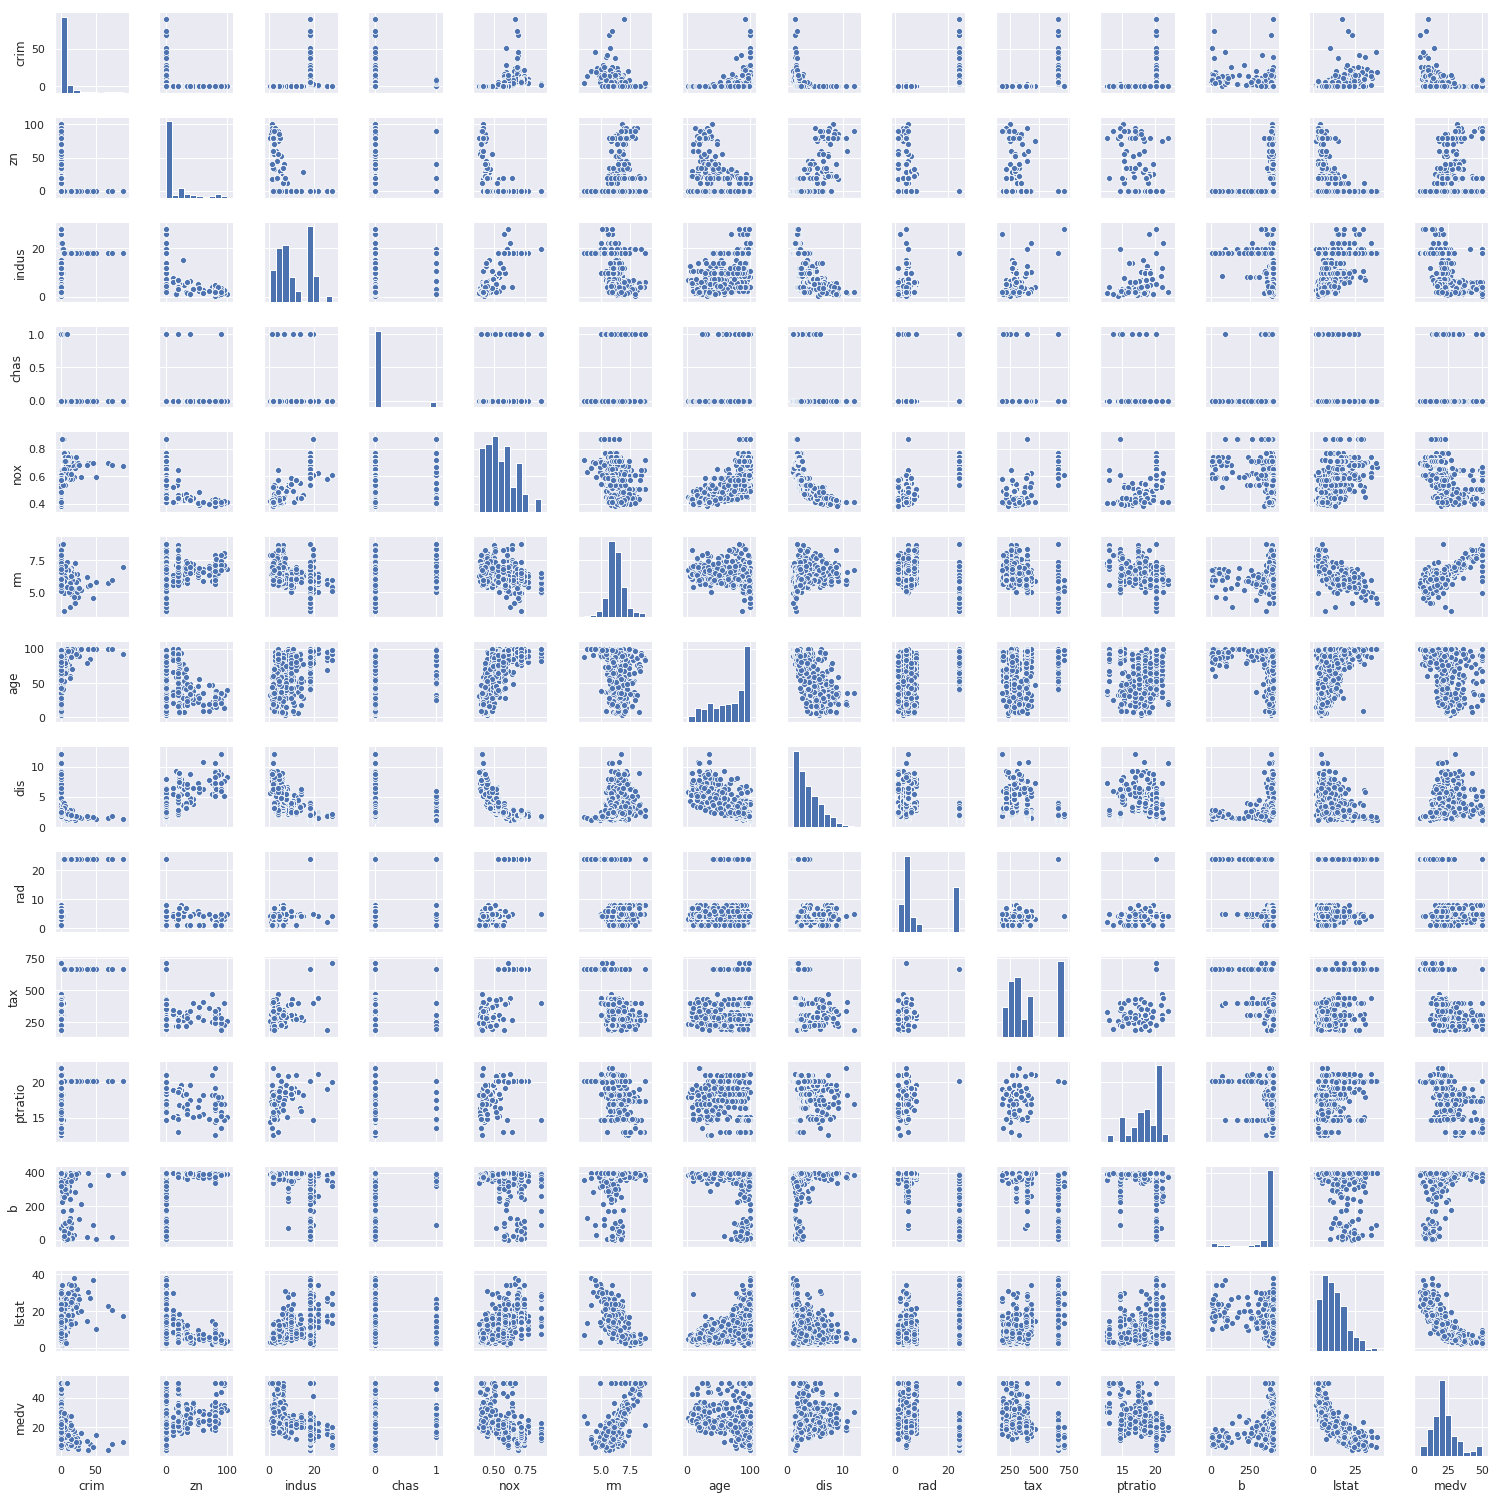

In [53]:
sns.pairplot(df, height=1.5)
plt.show()

### Correlation analysis and feature selection 

In order to select featrures for the regression model, we need to analyze correlations between the variables. 

In [13]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


Because there is so many variables the correlation matrix is difficult to read. A heatmap can be used to make the results easier to read. 

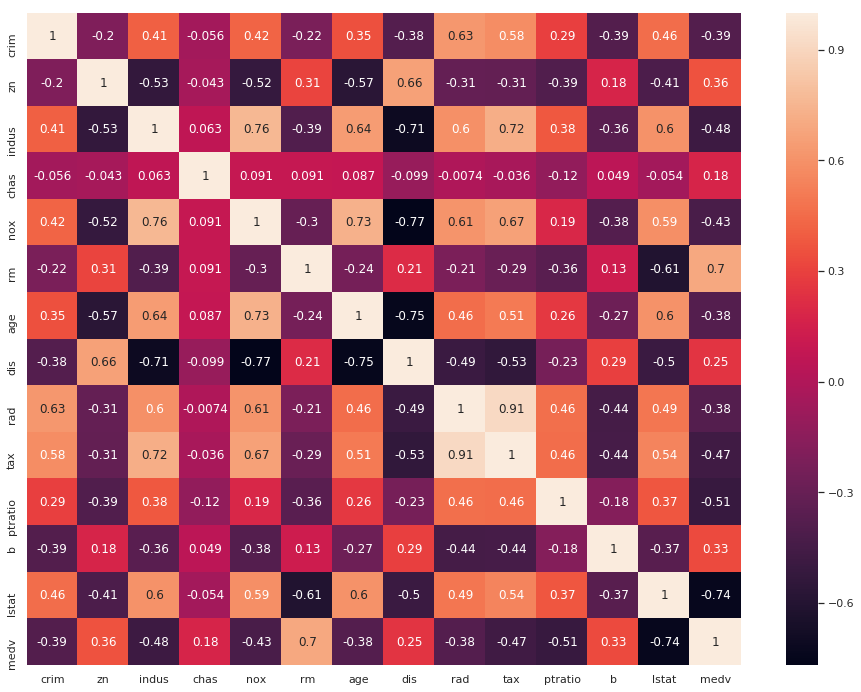

In [54]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Variables `RM` and `LSTAT` are strongly correlated with the target variable `MEDV`. `RM` and `LSTAT` are also moderately correlated with each other. The strenght of the correlation between these variables is not to high therefore both can be selected for further analysis. 

Other variables do not correlate significantly with the target variable.

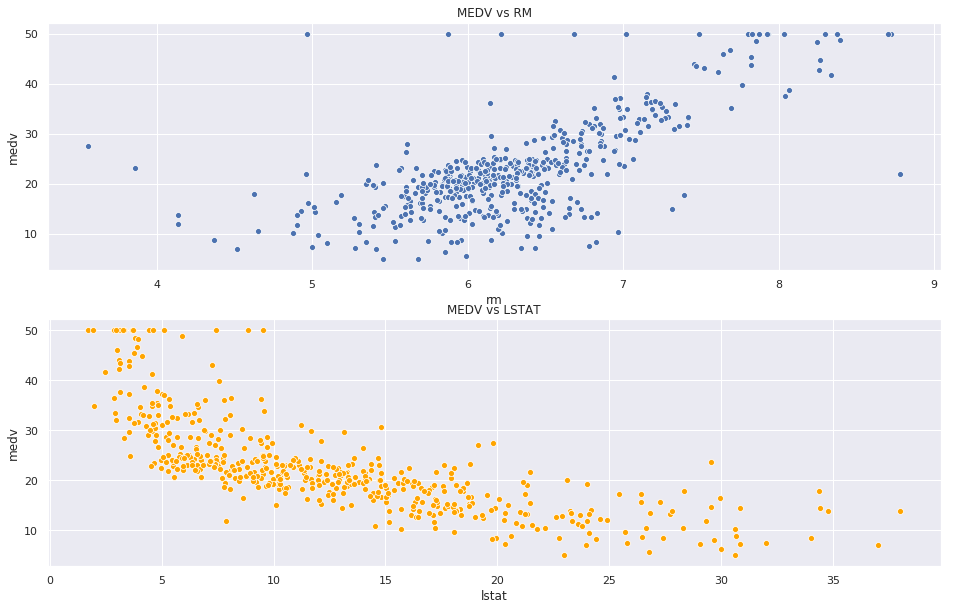

In [85]:
plt.figure(figsize=(16,10))

plt.subplot(211)
plt.title('MEDV vs RM')
sns.scatterplot(x=df['rm'], y=df['medv'])

plt.subplot(212)
plt.title('MEDV vs LSTAT')
sns.scatterplot(x=df['lstat'], y=df['medv'], color='orange')

plt.show()

There seems to be pretty visible linear dependecy between `MEDV` and `RM`. For `LSTAT` the trend line does not fit as lineary. Regression plots can be used to visualise these dependecies.

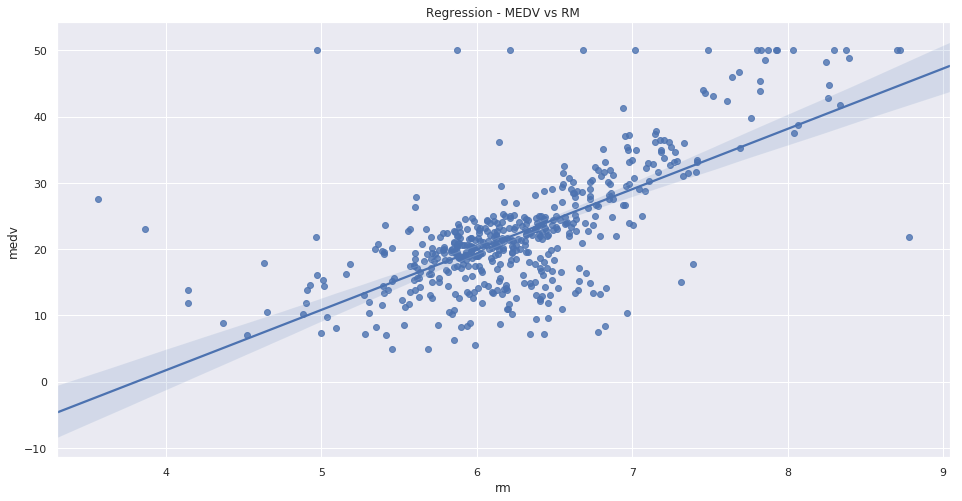

In [84]:
plt.figure(figsize=(16,8))
plt.title('Regression - MEDV vs RM')
sns.regplot(x=df['rm'], y=df['medv'])
plt.show()

The regression plot seems to confirm the linear dependency between `MEDV` and `RM`. 

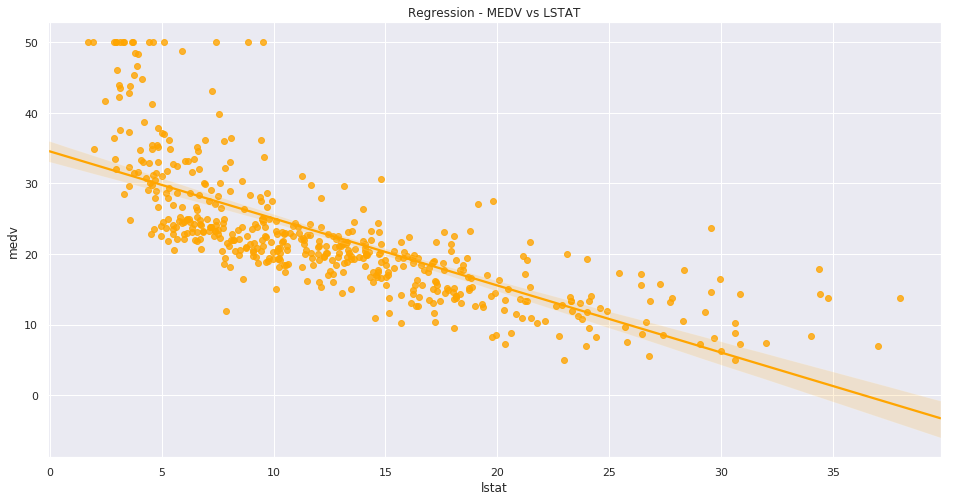

In [83]:
plt.figure(figsize=(16,8))
plt.title('Regression - MEDV vs LSTAT')
sns.regplot(x=df['lstat'], y=df['medv'], color='orange')
plt.show()

For `LSTAT` the fit is not so good. `MEDV` grows nonlineary for lower values of `LSTAT`.

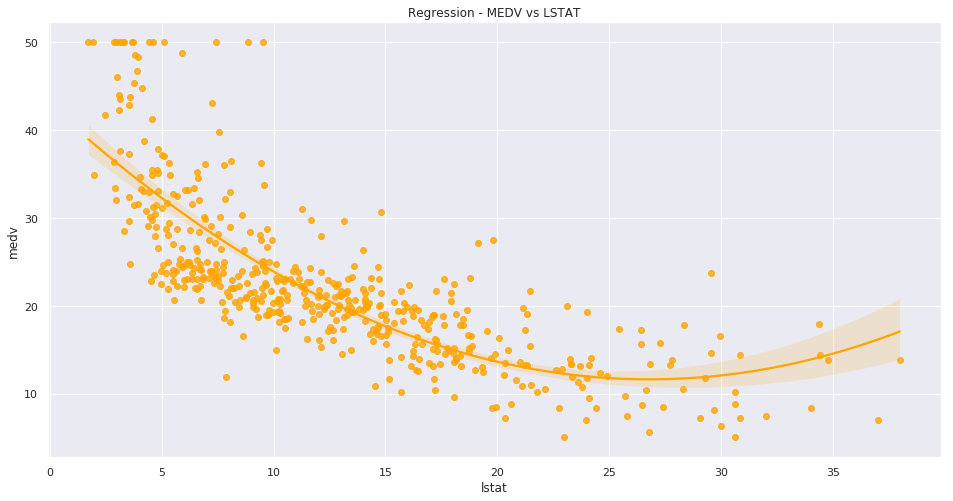

In [82]:
plt.figure(figsize=(16,8))
plt.title('Regression - MEDV vs LSTAT')
sns.regplot(x=df['lstat'], y=df['medv'], color='orange', truncate=True, order=2)
plt.show()

Curved trend line fits the data much better. 

### Linear Regression Model
Let's check how well will perform a simple linear regression model with one variable (`RM`).

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
# prepare the data
X, y = df['rm'].values.reshape(-1,1), df['medv'].values.reshape(-1,1)
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# score for training set
reg.score(X_train, y_train)

0.5161027263360893

In [101]:
# score for test set
reg.score(X_test, y_test)

0.3473389943324584